### Neural Network

In [1]:
import pandas as pd
import torch
import numpy as np

myData = pd.read_csv('data/default_of_credit_card_clients.csv',dtype=float,header=1)
myData=myData.iloc[1:,:]

train_y=np.array(myData.iloc[1:25000,-1])
train_x=np.array(myData.iloc[1:25000,1:-1])

validation_y=np.array(myData.iloc[25000:,-1])
validation_x=np.array(myData.iloc[25000:, 1:-1])

print(train_y.shape)
print(train_x.shape)
print(validation_y.shape)
print(validation_x.shape)

(24999,)
(24999, 23)
(4999,)
(4999, 23)


In [2]:
myData.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,15001.000000,167489.238975,1.603720,1.853128,1.551885,35.485883,-0.016767,-0.133838,-0.166172,-0.220641,...,43264.391113,40312.744725,38873.056169,5663.769292,5.921338e+03,5225.855695,4826.237741,4799.547618,5215.676423,0.221174
std,8660.109699,129747.029798,0.489132,0.790361,0.521969,9.217819,1.123760,1.197143,1.196878,1.169149,...,64333.443473,60797.723604,59554.677258,16563.524146,2.304123e+04,17607.229085,15666.396081,15278.535203,17777.736580,0.415044
min,2.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7501.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2328.000000,1763.500000,1256.000000,1000.000000,8.330000e+02,390.000000,296.000000,253.500000,118.000000,0.000000
50%,15001.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18105.000000,17074.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54509.000000,50196.000000,49200.500000,5006.000000,5.000000e+03,4505.000000,4013.500000,4032.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


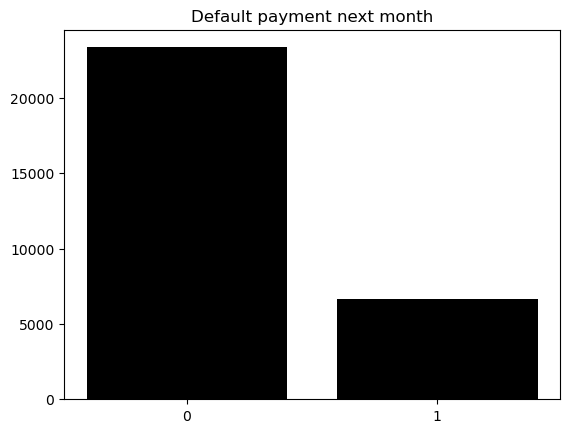

In [2]:
from matplotlib import pyplot as plt
plt.bar(['0','1'],[myData['default payment next month'].value_counts()[0],myData['default payment next month'].value_counts()[1]],color = 'black')
plt.title("Default payment next month")
# Show the plot
plt.show()

In [3]:
myData.columns

# SEX, EDUCATION, MARRIAGE

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
features=myData.iloc[:,1:-1].values
target=myData.iloc[:,-1].values
print(features.shape)
print(target.shape)
#print(myData['default payment next month'].value_counts())

(29999, 23)
(29999,)


<Axes: >

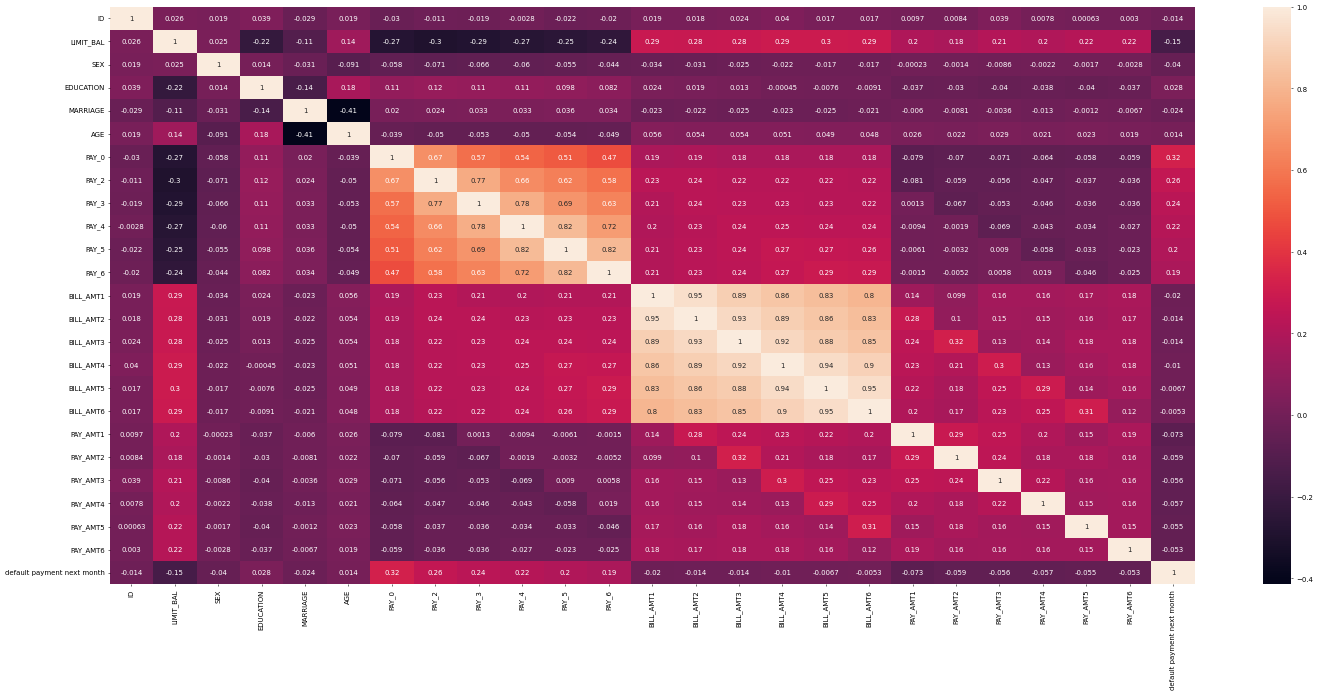

In [4]:
from matplotlib import pyplot as plt 
import seaborn as sns

plt.figure(figsize=(35,15),dpi=50)
sns.heatmap(myData.corr(),annot=True)#the correlation map around all features

       principal component 1  principal component 2  principal component 3
0                  -0.764588              -2.109230               1.091323
1                  -0.847403              -1.072348               0.414251
2                  -0.196591              -0.809200              -0.815306
3                  -0.841064              -0.073139              -0.990508
4                  -0.183799              -0.840424               0.371790
...                      ...                    ...                    ...
29994               2.523335               0.693124              -1.668357
29995              -1.775162              -0.051494              -0.408189
29996               0.357757              -3.313065               0.622965
29997               0.650439               0.722844               0.523418
29998              -0.145608              -0.810118              -1.313262

[29999 rows x 3 columns]


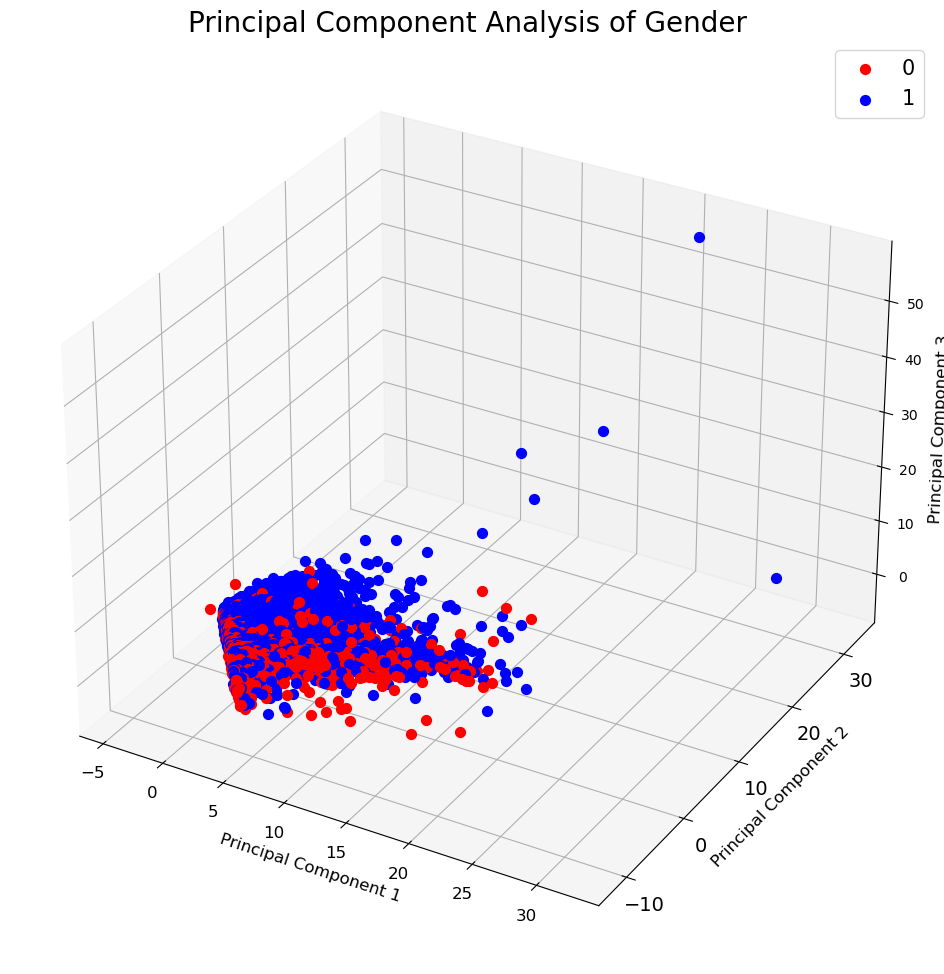

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt 
X=StandardScaler().fit_transform(features)  # normalizing the features
pca_gender = PCA(n_components=3)
principalComponents_gender = pca_gender.fit_transform(X)
principalComponents_gender.shape
principal_gender_Df = pd.DataFrame(data=principalComponents_gender, columns=['principal component 1','principal component 2','principal component 3'])
print(principal_gender_Df)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
targets = [0, 1]
colors = ['b', 'r']
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title('Principal Component Analysis of Gender ',fontsize=20)
ax.set_xlabel('Principal Component 1',fontsize=12)
ax.set_ylabel('Principal Component 2',fontsize=12)
ax.set_zlabel('Principal Component 3',fontsize=12)
indices=0
for element in target:
    if element == 0:
        color = 'b'
    else:
        color = 'r'
    ax.scatter(principal_gender_Df.loc[indices, 'principal component 1'], 
               principal_gender_Df.loc[indices, 'principal component 2'], 
               principal_gender_Df.loc[indices, 'principal component 3'] , c=color, s=50)
    indices += 1

plt.legend(targets,prop={'size':15})
plt.show()

In [3]:
# Load data after Isolation forest outlier detection/remove
myData = pd.read_csv('data/df_IFoutlier_c.csv',dtype=float,header=0)
myData= myData.iloc[:,1:25]
myData.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000,27527.00000,...,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000,27527.000000
mean,152457.296473,1.607767,1.862826,1.556944,35.257347,-0.016384,-0.139027,-0.172594,-0.229411,-0.27849,...,31515.391434,29286.075199,28247.989973,3900.903295,4004.562466,3465.999709,3203.722454,3233.420387,3372.369964,0.226360
std,119425.986031,0.488257,0.783931,0.522351,9.204122,1.129062,1.210902,1.216321,1.192877,1.15809,...,39861.519053,38004.453526,37611.772645,7448.885641,9062.002482,7343.702957,7330.594879,7671.126591,9327.606939,0.418482
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.00000,...,-50616.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,1770.000000,1320.000000,937.500000,758.000000,632.000000,326.000000,163.500000,112.000000,0.000000,0.000000
50%,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,17091.000000,15582.000000,14106.000000,2000.000000,2000.000000,1579.000000,1249.000000,1300.000000,1200.000000,0.000000
75%,210000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,46042.000000,41524.000000,39997.500000,4345.500000,4074.000000,3600.000000,3200.000000,3240.500000,3190.500000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,268084.000000,268084.000000,271388.000000,164820.000000,344467.000000,153400.000000,168459.000000,231133.000000,403500.000000,1.000000


In [18]:
features=myData.iloc[:,0:-1].values
target=myData.iloc[:,-1].values
print(features.shape)
print(target.shape)
#print(myData['default payment next month'].value_counts())

(27527, 23)
(27527,)


       principal component 1  principal component 2  principal component 3
0                  -1.820870               1.452357              -0.362168
1                  -0.593152               2.324082               1.167830
2                  -0.558833               1.150363               0.507730
3                   0.444771               0.542258              -0.955275
4                  -0.591837              -0.276672              -1.618075
...                      ...                    ...                    ...
27522               4.906419               2.177787               0.572727
27523               4.228349              -2.646362              -1.788117
27524              -1.857310               0.422436              -0.618852
27525               0.890791               3.068065               0.488380
27526               0.456964               0.595544              -1.673528

[27527 rows x 3 columns]


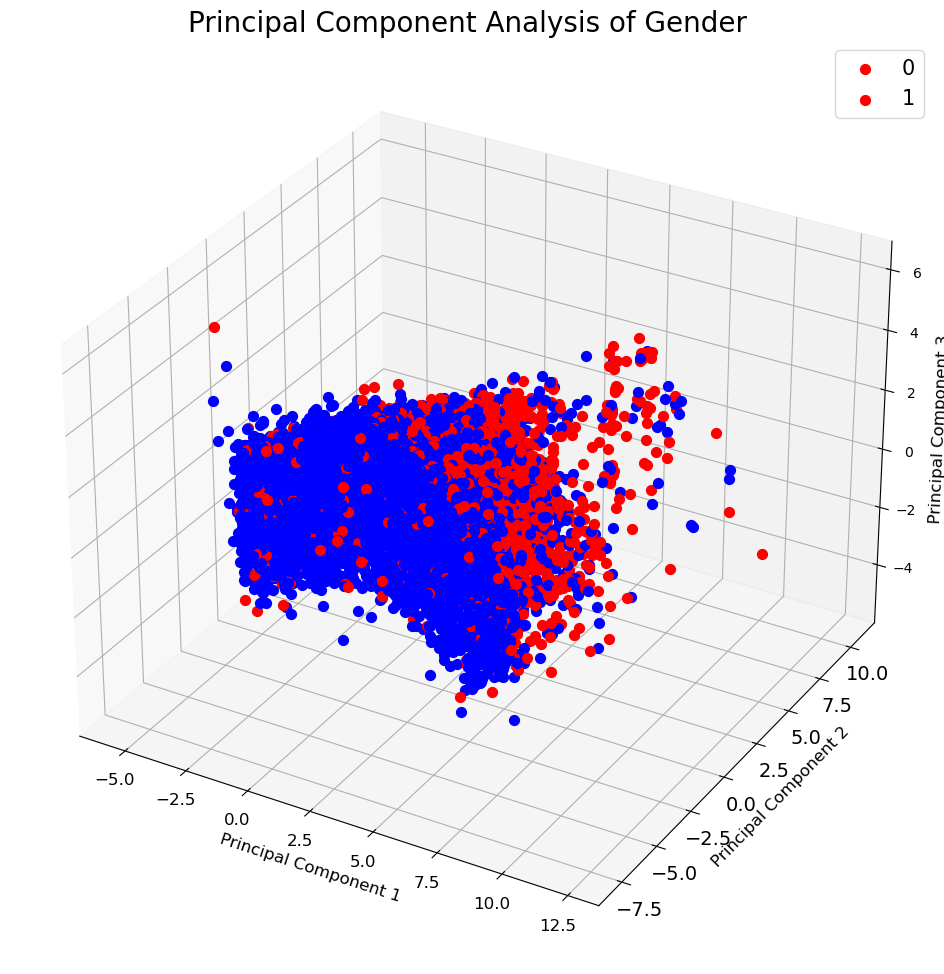

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt 
X=StandardScaler().fit_transform(features)  # normalizing the features
pca_gender = PCA(n_components=3)
principalComponents_gender = pca_gender.fit_transform(X)
principalComponents_gender.shape
principal_gender_Df = pd.DataFrame(data=principalComponents_gender, columns=['principal component 1','principal component 2','principal component 3'])
print(principal_gender_Df)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
targets = [0, 1]
colors = ['b', 'r']
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title('Principal Component Analysis of Gender ',fontsize=20)
ax.set_xlabel('Principal Component 1',fontsize=12)
ax.set_ylabel('Principal Component 2',fontsize=12)
ax.set_zlabel('Principal Component 3',fontsize=12)
indices=0
for element in target:
    if element == 0:
        color = 'b'
    else:
        color = 'r'
    ax.scatter(principal_gender_Df.loc[indices, 'principal component 1'], 
               principal_gender_Df.loc[indices, 'principal component 2'], 
               principal_gender_Df.loc[indices, 'principal component 3'] , c=color, s=50)
    indices += 1

plt.legend(targets,prop={'size':15})
plt.show()

#### Data Normalization


In [19]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#normalized_X = scaler.fit_transform(features)

In [92]:
from sklearn.model_selection import train_test_split

# split in to 70% and 30%
X_train, X_testval, y_train, y_testval = train_test_split(features, target, test_size=0.3, random_state=4)

# split the training and validation sets 15% and 15%
X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, test_size=0.5, random_state=4)

### Save the data into separated csv file

In [93]:
trainData = pd.DataFrame(X_train)
trainData['y'] = y_train
valData = pd.DataFrame(X_val)
valData['y'] = y_val
testData = pd.DataFrame(X_test)
testData['y'] = y_test
trainData.to_csv('data/train.csv', index=False)
valData.to_csv('data/validation.csv', index=False)
testData.to_csv('data/test.csv', index=False)

In [2]:
import pandas as pd
from torch.utils.data import Dataset
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [3]:
class CustomDataset(Dataset):
    def __init__(self, csv_file):
        myData = pd.read_csv(csv_file,dtype=float,header=1)
        self.labels = np.array(myData.iloc[:,-1])
        self.images = np.array(myData.iloc[:,1:-1],dtype=np.float32)
        self.labels=torch.from_numpy(self.labels)
        self.images=torch.from_numpy(self.images)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

In [96]:
batch = 5
train_dataset = CustomDataset('data/train.csv')
train_dataloader = DataLoader(train_dataset, batch_size=batch, shuffle=True)
validation_dataset = CustomDataset('data/validation.csv')
validation_dataloader = DataLoader(validation_dataset, batch_size=batch, shuffle=True)
test_dataset = CustomDataset('data/test.csv')
test_dataloader = DataLoader(test_dataset, batch_size=batch, shuffle=True)

In [4]:
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        
        self.relu1 = nn.ReLU()
        
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        # Linear function 2
        out = self.fc4(out)
        return out

In [5]:
input_dim = 22
hidden_dim = 15 
output_dim = 2
model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.001  # Hyper-parameter
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#### Added a $\ell_2$ penalty parameter to avoid high variance and overfitting problems:


In [6]:
def L2regloss(model):
    reg_loss = 0
    for param in model.parameters():
        reg_loss += (param**2).sum()
    return reg_loss

In [100]:
# ANN model training
count = 0
alpha = 0.1  # Hyper-parameter
epoches = 10
loss_list = []
runningLoss = 0
iteration_list = []
accuracy_list = []
training_loss = []
validating_loss = []
device='cpu'
model=model.to(device)
for epoch in range(epoches):
    for i, (images, labels) in enumerate(train_dataloader):

        train = Variable(images.view(-1, 22))
        labels = Variable(labels.view(-1))
        train = train.to(device)
        labels = labels.to(device)
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)

        # Calculate softmax and ross entropy loss
        fit_loss = error(outputs, labels.long())
        
        reg_loss = L2regloss(model)
        loss = fit_loss+ alpha*reg_loss
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        runningLoss += loss.item()
        
        if (i+1) % 200 == 0:
            # Calculate Accuracy         
            correct = 0
            testLoss = 0
            total = 0
            runningLoss /= 200 # training loss on the last batch
            training_loss.append(runningLoss)
            model.eval()
            # Predict test dataset
            for images, labels in validation_dataloader:
                
                images = images.to(device)
                
                labels = labels.to(device)

                test = Variable(images.view(-1, 22))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                #print(predicted)
                loss = error(outputs, labels.long())
                # Total number of labels
                total += len(labels.view(-1))
                
                testLoss += loss.item()

                # Total correct predictions
                correct += (predicted == labels.view(-1)).sum()
            test_loss = testLoss / total
            validating_loss.append(test_loss)
            accuracy = 100 * correct / float(total)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            model.train()
            print('Epoch [%d/%d], Step [%d/%d], Train Loss: %.4f, Validation Loss: %.4f'%(
                    epoch+1,
                    epoches,
                    i+1,
                    len(train_dataset)//batch+1, runningLoss,  test_loss))
            runningLoss = 0

Epoch [1/10], Step [200/3854], Train Loss: 239.8422, Validation Loss: 24.3831
Epoch [1/10], Step [400/3854], Train Loss: 117.3518, Validation Loss: 14.6148
Epoch [1/10], Step [600/3854], Train Loss: 80.7108, Validation Loss: 15.5253
Epoch [1/10], Step [800/3854], Train Loss: 72.3629, Validation Loss: 16.5054
Epoch [1/10], Step [1000/3854], Train Loss: 53.5665, Validation Loss: 8.0211
Epoch [1/10], Step [1200/3854], Train Loss: 40.1356, Validation Loss: 10.2236
Epoch [1/10], Step [1400/3854], Train Loss: 44.1768, Validation Loss: 8.6505
Epoch [1/10], Step [1600/3854], Train Loss: 37.0927, Validation Loss: 5.5569
Epoch [1/10], Step [1800/3854], Train Loss: 31.0010, Validation Loss: 11.6894
Epoch [1/10], Step [2000/3854], Train Loss: 29.4278, Validation Loss: 9.4536
Epoch [1/10], Step [2200/3854], Train Loss: 25.7173, Validation Loss: 2.8871
Epoch [1/10], Step [2400/3854], Train Loss: 31.4012, Validation Loss: 5.3847
Epoch [1/10], Step [2600/3854], Train Loss: 21.8393, Validation Loss: 1.

In [101]:
results_flatten = []
targets_flatten = []
def accuracy(data_loader):
    correct = 0.0 
    total = 0.0 
    with torch.no_grad():  # ingnore the gradient graph
        for batch in data_loader:
            images, labels = batch
            xs = images.view((-1, 22))
            ys = labels.view(-1)

            hat_ys = model(xs).detach().cpu()
            _, hat_ys = torch.max(hat_ys, 1)
            correct += (hat_ys == ys).sum()
            total += labels.size(0)
            results_flatten.append(hat_ys)
            targets_flatten.append(ys)

    return correct/total *100

In [102]:
model.eval()  # set the model to evaluation
train_accuracy = accuracy(train_dataloader)
print('Train accuracy of the MLP {:.3f}'.format(train_accuracy))
results_flatten = []
targets_flatten = []
validation_accuracy = accuracy(validation_dataloader)
print('Validation accuracy of the MLP {:.3f}'.format(validation_accuracy))

Train accuracy of the MLP 77.277
Validation accuracy of the MLP 77.810


In [103]:
# convert tensor to list
results_flatten = [t.tolist() for t in results_flatten]
results_flatten = [item for sublist in results_flatten for item in sublist]
targets_flatten = [t.tolist() for t in targets_flatten]
targets_flatten = [item for sublist in targets_flatten for item in sublist]

Accuracy: 0.7781
Precision-score : 0.9994
Recall-Score : 0.7781
F1-Score: 0.875
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      4127
           1       0.00      0.00      0.00         1

    accuracy                           0.78      4128
   macro avg       0.50      0.39      0.44      4128
weighted avg       1.00      0.78      0.87      4128

Confusion matrix

 [[3212  915]
 [   1    0]]

True Positives(TP) =  3212

True Negatives(TN) =  0

False Positives(FP) =  915

False Negatives(FN) =  1


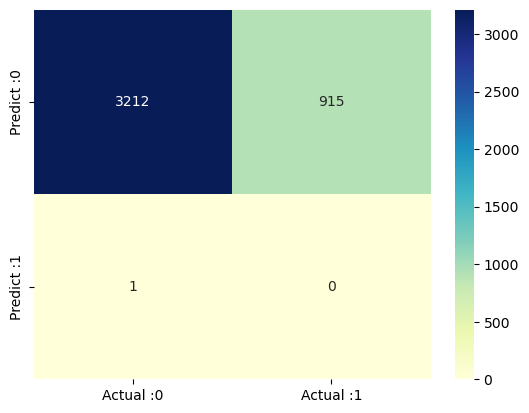

In [104]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
print('Accuracy: {0:0.4f}'.format(accuracy_score(results_flatten, targets_flatten)))
print("Precision-score :",
        round(precision_score(results_flatten, targets_flatten, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(results_flatten, targets_flatten, average='weighted'), 4))
print("F1-Score:", round(f1_score(results_flatten, targets_flatten, average='weighted'), 4))

from sklearn.metrics import classification_report  


print(classification_report(results_flatten, targets_flatten))

from sklearn.metrics import confusion_matrix  
import seaborn as sns  

cm = confusion_matrix(results_flatten, targets_flatten)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])


cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show()  

### We can see that our model have the problem with prediction of positive class, as the model can only be able to predict 0 class, this maybe the issue with the inbalance categories in the target variable.

### Test for improving the model by consider the MLP with two layers (with sigmoid activation at the end)

In [4]:
class MLP(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize):
        super(MLP, self).__init__()
        self.linear1 = torch.nn.Linear(inputSize, hiddenSize)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(hiddenSize, hiddenSize)
        self.linear3 = torch.nn.Linear(hiddenSize, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        y = self.linear1(x)
        y = self.relu(y)
        y = self.linear2(y)
        y = self.relu(y)
        y = self.linear3(y)
        y = self.sigmoid(y)
        return y

In [106]:
input_dim = 22
hiddenSize = 16
del model  # delete the previous model
model = MLP(input_dim, hiddenSize)

# binary cross entropy loss
error = torch.nn.BCELoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [107]:
# ANN model training
count = 0
alpha = 0.1
epoches = 10
loss_list = []
runningLoss=0
iteration_list = []
accuracy_list = []
training_loss = []
validating_loss = []
device='cpu'
model=model.to(device)
for epoch in range(epoches):
    for i, (images, labels) in enumerate(train_dataloader):

        train = Variable(images.view(-1, 22))
        labels = Variable(labels.view(-1))
        train = train.to(device)
        labels = labels.to(device)
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        # Calculate softmax and ross entropy loss
        fit_loss = error(outputs, (labels.unsqueeze(1)).float())
        
        reg_loss = L2regloss(model)
        loss = fit_loss+ alpha*reg_loss
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        runningLoss += loss.item()
        
        if (i+1) % 200 == 0:
            # Calculate Accuracy         
            correct = 0
            testLoss = 0
            total = 0
            runningLoss /= 200 # training loss on the last batch
            training_loss.append(runningLoss)
            model.eval()
            # Predict test dataset
            for images, labels in validation_dataloader:
                
                images = images.to(device)
                
                labels = labels.to(device)

                test = Variable(images.view(-1, 22))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                loss = error(outputs, (labels.unsqueeze(1)).float())
                # Total number of labels
                total += len(labels.view(-1))
                
                testLoss += loss.item()

                # Total correct predictions
                correct += (predicted == labels.view(-1)).sum()
            test_loss = testLoss / total
            validating_loss.append(test_loss)
            accuracy = 100 * correct / float(total)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            model.train()
            print('Epoch [%d/%d], Step [%d/%d], Train Loss: %.4f, Validation Loss: %.4f'%(
                    epoch+1,
                    epoches,
                    i+1,
                    len(train_dataset)//batch+1, runningLoss,  test_loss))
            runningLoss = 0

Epoch [1/10], Step [200/3854], Train Loss: 22.0216, Validation Loss: 3.6657
Epoch [1/10], Step [400/3854], Train Loss: 17.9453, Validation Loss: 3.4284
Epoch [1/10], Step [600/3854], Train Loss: 16.7566, Validation Loss: 3.3526
Epoch [1/10], Step [800/3854], Train Loss: 17.2643, Validation Loss: 3.6137
Epoch [1/10], Step [1000/3854], Train Loss: 19.3154, Validation Loss: 3.6595
Epoch [1/10], Step [1200/3854], Train Loss: 19.6392, Validation Loss: 3.4135
Epoch [1/10], Step [1400/3854], Train Loss: 15.8547, Validation Loss: 3.2503
Epoch [1/10], Step [1600/3854], Train Loss: 16.6993, Validation Loss: 2.7014
Epoch [1/10], Step [1800/3854], Train Loss: 7.3971, Validation Loss: 0.2950
Epoch [1/10], Step [2000/3854], Train Loss: 1.7303, Validation Loss: 0.2267
Epoch [1/10], Step [2200/3854], Train Loss: 1.0828, Validation Loss: 0.2455
Epoch [1/10], Step [2400/3854], Train Loss: 1.0960, Validation Loss: 0.1622
Epoch [1/10], Step [2600/3854], Train Loss: 1.0455, Validation Loss: 0.1822
Epoch [1

In [17]:
results_flatten = []
targets_flatten = []
def accuracy2(data_loader, model):
    correct = 0.0 
    total = 0.0 
    with torch.no_grad(): 
        for batch in data_loader:
            batch_pred = []
            images, labels = batch
            xs = images.view((-1, 22))
            ys = labels.view(-1)
            targets_flatten.append(ys)

            hat_ys = model(xs).detach().cpu()
            for element in hat_ys:
                #print(element)
                if element[0]>=0.5:
                    batch_pred.append(1.0)
                    results_flatten .append(1.0)
                else:
                    batch_pred.append(0.0)
                    results_flatten.append(0.0)
            #print(hat_ys)
            #print(ys)
            
            batch_pred = torch.Tensor(batch_pred)
            #print(batch_pred)
            correct += (batch_pred == ys).sum()
            total += labels.size(0)

    return correct/total *100

In [109]:
training_loss.pop()
validating_loss.insert(0, float('NaN'))

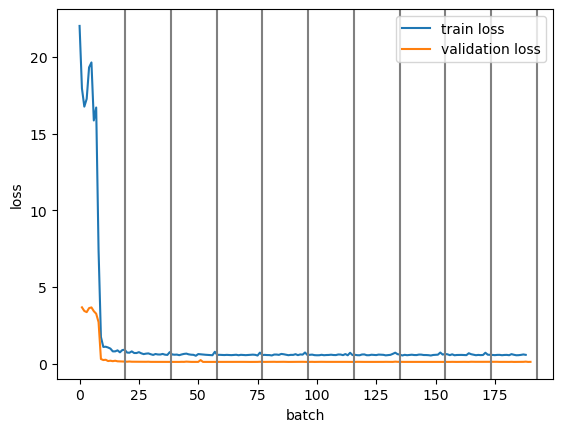

In [121]:
from matplotlib import pyplot as plt 
plt.plot(training_loss, label="train loss")
plt.plot(validating_loss, label="validation loss")
plt.legend(loc='upper right')

for i in range(epoches):
    plt.axvline(x=(len(train_dataset)//batch+1)*(i+1)/200,color='gray')

plt.ylabel('loss');
plt.xlabel('batch')
plt.show()

In [124]:
model.eval() # set the model to evaluation
train_accuracy = accuracy2(train_dataloader, model)
print('Train accuracy of the MLP {:.3f}'.format(train_accuracy))
results_flatten = []
targets_flatten = []
validation_accuracy = accuracy2(validation_dataloader, model)
print('Validation accuracy of the MLP {:.3f}'.format(validation_accuracy))

Train accuracy of the MLP 76.395
Validation accuracy of the MLP 76.865


In [125]:
targets_flatten = [t.tolist() for t in targets_flatten]
targets_flatten = [item for sublist in targets_flatten for item in sublist]

Accuracy: 0.7687
Precision-score : 0.9304
Recall-Score : 0.7687
F1-Score: 0.8361
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      3958
         1.0       0.07      0.38      0.12       170

    accuracy                           0.77      4128
   macro avg       0.52      0.58      0.49      4128
weighted avg       0.93      0.77      0.84      4128

Confusion matrix

 [[3108  850]
 [ 105   65]]

True Positives(TP) =  3108

True Negatives(TN) =  65

False Positives(FP) =  850

False Negatives(FN) =  105


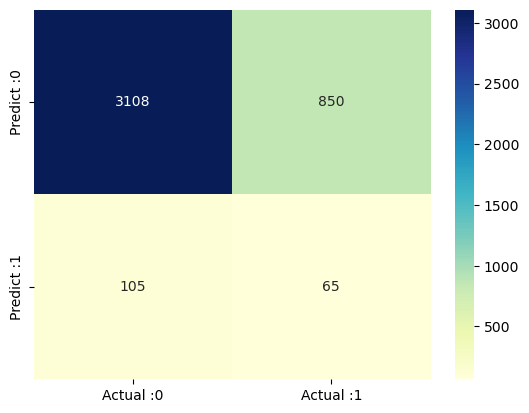

In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
print('Accuracy: {0:0.4f}'.format(accuracy_score(results_flatten, targets_flatten)))
print("Precision-score :",
        round(precision_score(results_flatten, targets_flatten, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(results_flatten, targets_flatten, average='weighted'), 4))
print("F1-Score:", round(f1_score(results_flatten, targets_flatten, average='weighted'), 4))

from sklearn.metrics import classification_report  


print(classification_report(results_flatten, targets_flatten))

from sklearn.metrics import confusion_matrix  
import seaborn as sns  


cm = confusion_matrix(results_flatten, targets_flatten)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])


cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show() 

#### To solve the target categorial data imbalance problem (it makes the model more perfer to predict the 0 classes rather than 1's) let try to construct more class 1 datas with SMOTE algorithm.

In [229]:
from sklearn.neighbors import NearestNeighbors

def NaiveSMOTE(X, N=100, K=5):
    """
    {X}: minority class samples;
    {N}: Amount of SMOTE; default 100;
    {K} Number of nearest; default 5;
    """
    # {T}: Number of minority class samples; 
    T = X.shape[0]
    if N < 100:
        T = (N/100) * T
        N = 100
    N = (int)(N/100)
    
    numattrs = X.shape[1]
    samples = X[:T]
    neigh = NearestNeighbors(n_neighbors=K)
    neigh.fit(samples)
    Synthetic = np.zeros((T*N, numattrs))
    newindex = 0
    
    def Populate(N, i, nns, newindex):
        """
        Function to generate the synthetic samples.
        """
        for n in range(N):
            nn = np.random.randint(0, K)
            for attr in range(numattrs):
                dif = samples[nns[nn], attr] - samples[i, attr]
                gap = np.random.random()
                Synthetic[newindex, attr] = samples[i, attr] + gap*dif
            newindex += 1
        return newindex
    
    for i in range(T):
        nns = neigh.kneighbors([samples[i]], K, return_distance=False)
        newindex = Populate(N, i, nns[0], newindex)
    return Synthetic

In [230]:
testD = pd.read_csv('data/train.csv',dtype=float,header=0)
testD= testD.iloc[:,0:25]
testD

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,y
0,300000.0,2.0,2.0,1.0,40.0,1.0,-2.0,-2.0,-2.0,-1.0,...,0.0,280.0,0.0,0.0,0.0,0.0,280.0,0.0,0.0,0.0
1,170000.0,1.0,1.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,...,137986.0,141319.0,139463.0,13000.0,6154.0,15000.0,6000.0,7000.0,5000.0,0.0
2,100000.0,2.0,1.0,2.0,25.0,2.0,0.0,0.0,2.0,0.0,...,86433.0,65149.0,64810.0,4100.0,5514.0,2500.0,3000.0,4000.0,3000.0,1.0
3,220000.0,2.0,5.0,2.0,46.0,0.0,0.0,0.0,0.0,0.0,...,113520.0,101164.0,88354.0,5000.0,6000.0,5000.0,3649.0,3580.0,4000.0,0.0
4,320000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19263,330000.0,1.0,1.0,1.0,49.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,1590.0,0.0,2130.0,65.0,3775.0,1590.0,0.0,2130.0,7700.0,0.0
19264,210000.0,2.0,2.0,2.0,24.0,-2.0,-2.0,-2.0,-1.0,-1.0,...,7293.0,1508.0,2498.0,4224.0,2631.0,8132.0,1563.0,2506.0,2135.0,0.0
19265,360000.0,1.0,1.0,1.0,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,11358.0,15479.0,20934.0,5066.0,6704.0,11415.0,15556.0,21039.0,19073.0,0.0
19266,180000.0,2.0,1.0,2.0,31.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,5921.0,0.0,0.0,0.0,0.0,0.0,1.0


In [231]:
def view_y(y):
    print(f"class 0: {len(np.where(y==0.0)[0])}\nclass 1: {len(np.where(y==1.0)[0])}")

In [242]:
features=testD.iloc[:,0:-1].values
target=testD.iloc[:,-1].values
print(features.shape)
print(target.shape)
print(view_y(target)) # class 1 is 4 times less than class 0

(19268, 23)
(19268,)
class 0: 14899
class 1: 4369
None


In [243]:
X_over_sampling = NaiveSMOTE(features[target==1.0], N=280, K=5)
print(X_over_sampling.shape)
new_X = np.r_[features, X_over_sampling]
new_y = np.r_[target, np.ones((X_over_sampling.shape[0]))]
print(new_X.shape)
print(new_y.shape)
print(view_y(new_y)) # the dataset now looks more balanced

(8738, 23)
(28006, 23)
(28006,)
class 0: 14899
class 1: 13107
None


#### Loaded balanced train dataset and train the network again

In [244]:
newTrain = pd.DataFrame(new_X)
newTrain['y'] = new_y
newTrain.to_csv('data/balanced_train_data.csv', index=False)

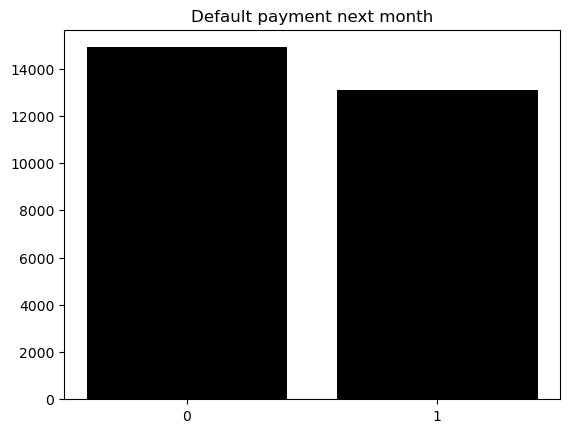

In [25]:
train_enhance = pd.read_csv('data/balanced_train_data.csv',dtype=float)
from matplotlib import pyplot as plt
plt.bar(['0','1'],[train_enhance['y'].value_counts()[0],train_enhance['y'].value_counts()[1]],color = 'black')
plt.title("Default payment next month")
# Show the plot
plt.show()

In [8]:
import numpy as np 
batch = 8
train_dataset = CustomDataset('data/balanced_train_data.csv')
train_dataloader = DataLoader(train_dataset, batch_size=batch, shuffle=True)
validation_dataset = CustomDataset('data/validation.csv')
validation_dataloader = DataLoader(validation_dataset, batch_size=batch, shuffle=True)
test_dataset = CustomDataset('data/test.csv')
test_dataloader = DataLoader(test_dataset, batch_size=batch, shuffle=True)

In [9]:
input_dim = 22
hidden_dim = 15 
output_dim = 2
model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.001  # Hyper-parameter
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
# ANN model training
count = 0
alpha = 0.1  # Hyper-parameter
epoches = 6
loss_list = []
runningLoss = 0
iteration_list = []
accuracy_list = []
training_loss = []
validating_loss = []
device='cpu'
model=model.to(device)
for epoch in range(epoches):
    for i, (images, labels) in enumerate(train_dataloader):

        train = Variable(images.view(-1, 22))
        labels = Variable(labels.view(-1))
        train = train.to(device)
        labels = labels.to(device)
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)

        # Calculate softmax and ross entropy loss
        fit_loss = error(outputs, labels.long())
        
        reg_loss = L2regloss(model)
        loss = fit_loss+ alpha*reg_loss
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        runningLoss += loss.item()
        
        if (i+1) % 200 == 0:
            # Calculate Accuracy         
            correct = 0
            testLoss = 0
            total = 0
            runningLoss /= 200 # training loss on the last batch
            training_loss.append(runningLoss)
            model.eval()
            # Predict test dataset
            for images, labels in validation_dataloader:
                
                images = images.to(device)
                
                labels = labels.to(device)

                test = Variable(images.view(-1, 22))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                #print(predicted)
                loss = error(outputs, labels.long())
                # Total number of labels
                total += len(labels.view(-1))
                
                testLoss += loss.item()

                # Total correct predictions
                correct += (predicted == labels.view(-1)).sum()
            test_loss = testLoss / total
            validating_loss.append(test_loss)
            accuracy = 100 * correct / float(total)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            model.train()
            print('Epoch [%d/%d], Step [%d/%d], Train Loss: %.4f, Validation Loss: %.4f'%(
                    epoch+1,
                    epoches,
                    i+1,
                    len(train_dataset)//batch+1, runningLoss,  test_loss))
            runningLoss = 0

Epoch [1/6], Step [200/3501], Train Loss: 286.4540, Validation Loss: 15.7022
Epoch [1/6], Step [400/3501], Train Loss: 162.3477, Validation Loss: 15.8848
Epoch [1/6], Step [600/3501], Train Loss: 138.7174, Validation Loss: 8.4643
Epoch [1/6], Step [800/3501], Train Loss: 115.6237, Validation Loss: 8.7832
Epoch [1/6], Step [1000/3501], Train Loss: 83.0290, Validation Loss: 8.6212
Epoch [1/6], Step [1200/3501], Train Loss: 88.2077, Validation Loss: 5.3996
Epoch [1/6], Step [1400/3501], Train Loss: 54.7938, Validation Loss: 4.0387
Epoch [1/6], Step [1600/3501], Train Loss: 79.5527, Validation Loss: 6.2775
Epoch [1/6], Step [1800/3501], Train Loss: 60.0883, Validation Loss: 3.7786
Epoch [1/6], Step [2000/3501], Train Loss: 62.1434, Validation Loss: 20.1953
Epoch [1/6], Step [2200/3501], Train Loss: 56.3002, Validation Loss: 6.3585
Epoch [1/6], Step [2400/3501], Train Loss: 35.0460, Validation Loss: 7.5421
Epoch [1/6], Step [2600/3501], Train Loss: 40.8610, Validation Loss: 2.4545
Epoch [1/

In [11]:
training_loss.pop()
validating_loss.insert(0, float('NaN'))

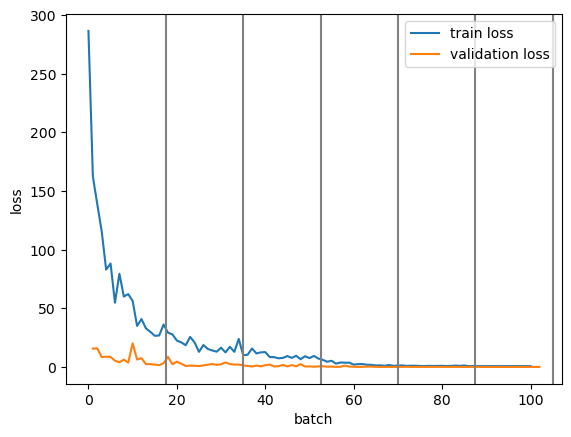

In [12]:
from matplotlib import pyplot as plt 
plt.plot(training_loss, label="train loss")
plt.plot(validating_loss, label="validation loss")
plt.legend(loc='upper right')

for i in range(epoches):
    plt.axvline(x=(len(train_dataset)//batch+1)*(i+1)/200,color='gray')

plt.ylabel('loss');
plt.xlabel('batch')
plt.show()

In [13]:
results_flatten = []
targets_flatten = []
def accuracy(data_loader):
    correct = 0.0 
    total = 0.0 
    with torch.no_grad():  # ingnore the gradient graph
        for batch in data_loader:
            images, labels = batch
            xs = images.view((-1, 22))
            ys = labels.view(-1)

            hat_ys = model(xs).detach().cpu()
            _, hat_ys = torch.max(hat_ys, 1)
            correct += (hat_ys == ys).sum()
            total += labels.size(0)
            results_flatten.append(hat_ys)
            targets_flatten.append(ys)

    return correct/total *100

In [15]:
model.eval()  # set the model to evaluation
train_accuracy = accuracy(train_dataloader)
print('Train accuracy of the MLP {:.3f}'.format(train_accuracy))
results_flatten = []
targets_flatten = []
validation_accuracy = accuracy(validation_dataloader)
print('Validation accuracy of the MLP {:.3f}'.format(validation_accuracy))

Train accuracy of the MLP 78.423
Validation accuracy of the MLP 77.059


In [16]:
# convert tensor to list
results_flatten = [t.tolist() for t in results_flatten]
results_flatten = [item for sublist in results_flatten for item in sublist]
targets_flatten = [t.tolist() for t in targets_flatten]
targets_flatten = [item for sublist in targets_flatten for item in sublist]

Accuracy: 0.7706
Precision-score : 0.9708
Recall-Score : 0.7706
F1-Score: 0.8573
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      4066
           1       0.02      0.24      0.03        62

    accuracy                           0.77      4128
   macro avg       0.50      0.51      0.45      4128
weighted avg       0.97      0.77      0.86      4128

Confusion matrix

 [[3166  900]
 [  47   15]]

True Positives(TP) =  3166

True Negatives(TN) =  15

False Positives(FP) =  900

False Negatives(FN) =  47


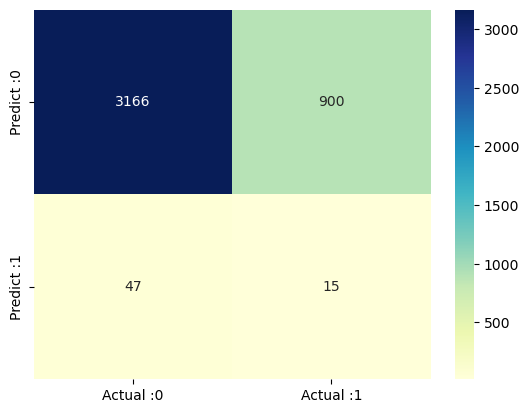

In [17]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
print('Accuracy: {0:0.4f}'.format(accuracy_score(results_flatten, targets_flatten)))
print("Precision-score :",
        round(precision_score(results_flatten, targets_flatten, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(results_flatten, targets_flatten, average='weighted'), 4))
print("F1-Score:", round(f1_score(results_flatten, targets_flatten, average='weighted'), 4))

from sklearn.metrics import classification_report  


print(classification_report(results_flatten, targets_flatten))

from sklearn.metrics import confusion_matrix  
import seaborn as sns  

cm = confusion_matrix(results_flatten, targets_flatten)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])


cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show()  

In [18]:
model.eval()  # set the model to evaluation
train_accuracy = accuracy(train_dataloader)
results_flatten = []
targets_flatten = []
test_accuracy = accuracy(test_dataloader)
print('Validation accuracy of the MLP {:.3f}'.format(test_accuracy))

Validation accuracy of the MLP 76.677


In [19]:
# convert tensor to list
results_flatten = [t.tolist() for t in results_flatten]
results_flatten = [item for sublist in results_flatten for item in sublist]
targets_flatten = [t.tolist() for t in targets_flatten]
targets_flatten = [item for sublist in targets_flatten for item in sublist]

Accuracy: 0.7668
Precision-score : 0.9733
Recall-Score : 0.7668
F1-Score: 0.8548
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      4067
           1       0.02      0.37      0.05        62

    accuracy                           0.77      4129
   macro avg       0.51      0.57      0.46      4129
weighted avg       0.97      0.77      0.85      4129

Confusion matrix

 [[3143  924]
 [  39   23]]

True Positives(TP) =  3143

True Negatives(TN) =  23

False Positives(FP) =  924

False Negatives(FN) =  39


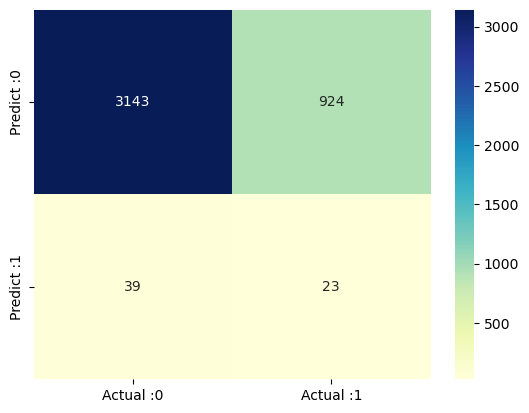

In [20]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
print('Accuracy: {0:0.4f}'.format(accuracy_score(results_flatten, targets_flatten)))
print("Precision-score :",
        round(precision_score(results_flatten, targets_flatten, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(results_flatten, targets_flatten, average='weighted'), 4))
print("F1-Score:", round(f1_score(results_flatten, targets_flatten, average='weighted'), 4))

from sklearn.metrics import classification_report  


print(classification_report(results_flatten, targets_flatten))

from sklearn.metrics import confusion_matrix  
import seaborn as sns  

cm = confusion_matrix(results_flatten, targets_flatten)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])


cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show()  

### Let work with the scikit pre-defined package MLP classifier with the same parameter as above, to see if the issue are the same

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
# Step 1: Load the dataset
ehanced_train = pd.read_csv('data/balanced_train_data.csv')
training_data = pd.read_csv('data/train.csv')
validation_data = pd.read_csv('data/validation.csv')
test_data = pd.read_csv('data/test.csv')
# Step 2: Split the data into features and target
X_EnhancedTrain = ehanced_train.iloc[:, 1:-1]  # Features
y_EnhancedTrain = ehanced_train.iloc[:, -1]  # Target
X_train = training_data.iloc[:, 1:-1]  # Features
y_train = training_data.iloc[:, -1]  # Target
X_val = validation_data.iloc[:, 1:-1]  # Features
y_val = validation_data.iloc[:, -1]  # Target
X_test = test_data.iloc[:, 1:-1]  # Features
y_test = test_data.iloc[:, -1]  # Target

# Step 3: Normalize data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [20]:
mlp_clf = MLPClassifier(solver='adam', hidden_layer_sizes=(15, 2),activation='logistic',batch_size=8,learning_rate_init=0.001,shuffle=True,alpha=0.1)
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size=8,
              hidden_layer_sizes=(15, 2))

In [21]:
# Evaluate the accuracy on validation_data
y_val_pred = mlp_clf.predict(X_val)
val_accuracy_default = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy without hyperparameter tuning: {val_accuracy_default}")

Validation accuracy without hyperparameter tuning: 0.7783967062242674


Accuracy: 0.7784
Precision-score : 1.0
Recall-Score : 0.7784
F1-Score: 0.8754
              precision    recall  f1-score   support

         0.0       1.00      0.78      0.88      4129
         1.0       0.00      0.00      0.00         0

    accuracy                           0.78      4129
   macro avg       0.50      0.39      0.44      4129
weighted avg       1.00      0.78      0.88      4129

Confusion matrix

 [[3214  915]
 [   0    0]]

True Positives(TP) =  3214

True Negatives(TN) =  0

False Positives(FP) =  915

False Negatives(FN) =  0


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/user

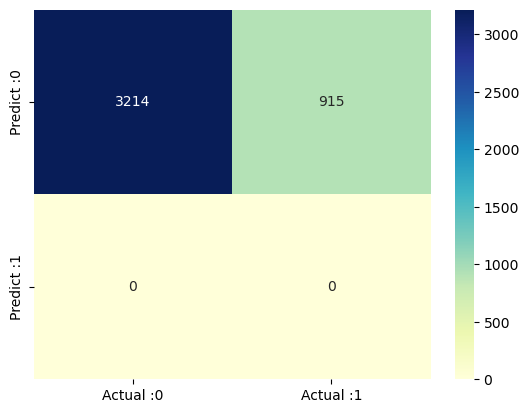

In [22]:
print('Accuracy: {0:0.4f}'.format(accuracy_score( y_val_pred, y_val)))
print("Precision-score :",
        round(precision_score(y_val_pred, y_val, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(y_val_pred, y_val, average='weighted'), 4))
print("F1-Score:", round(f1_score(y_val_pred, y_val, average='weighted'), 4))

print(classification_report(y_val_pred, y_val))

# Print confusion matrix of the model
cm = confusion_matrix(y_val_pred, y_val)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show()  

#### Now we see a similar behaviour as before, It may be the case that we have not yet tun our hyper-parameter in the classifie, so let try if hyper-parameter tun helps with RandomSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV
mlp_clf = MLPClassifier(solver='adam', hidden_layer_sizes=(15, 2),activation='logistic',batch_size=8,learning_rate_init=0.001,shuffle=True,alpha=0.1)
params={
    "learning_rate_init":[0.001,0.01,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40],
    "solver":['lbfgs','sgd','adam'],
    "hidden_layer_sizes":[(12, 2),(8, 2),(7, 2),(15, 2)],
    "batch_size":[2,3,4,5,6,7,8,9,15,18],
    "alpha":[0.00001,0.0001,0.0005,0.001,0.01,0.05,0.1,0.3],
    }

# Set up the random search with the stacking model
MlpClff=RandomizedSearchCV(estimator= MLPClassifier(),param_distributions=params,n_iter=20,scoring='accuracy',cv=4,verbose=3)
MlpClff.fit(X_train, y_train)

best_stacking_model = MlpClff.best_estimator_
Y_pred = best_stacking_model.predict(X_test)
MlpClff.best_params_

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV 1/4] END alpha=0.0001, batch_size=8, hidden_layer_sizes=(8, 2), learning_rate_init=0.15, solver=adam;, score=0.773 total time=   2.2s
[CV 2/4] END alpha=0.0001, batch_size=8, hidden_layer_sizes=(8, 2), learning_rate_init=0.15, solver=adam;, score=0.773 total time=   2.5s
[CV 3/4] END alpha=0.0001, batch_size=8, hidden_layer_sizes=(8, 2), learning_rate_init=0.15, solver=adam;, score=0.773 total time=   3.8s
[CV 4/4] END alpha=0.0001, batch_size=8, hidden_layer_sizes=(8, 2), learning_rate_init=0.15, solver=adam;, score=0.773 total time=   3.8s
[CV 1/4] END alpha=0.1, batch_size=6, hidden_layer_sizes=(7, 2), learning_rate_init=0.15, solver=adam;, score=0.773 total time=   5.5s
[CV 2/4] END alpha=0.1, batch_size=6, hidden_layer_sizes=(7, 2), learning_rate_init=0.15, solver=adam;, score=0.773 total time=   3.3s
[CV 3/4] END alpha=0.1, batch_size=6, hidden_layer_sizes=(7, 2), learning_rate_init=0.15, solver=adam;, score=0.773 t

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END alpha=0.01, batch_size=15, hidden_layer_sizes=(8, 2), learning_rate_init=0.35, solver=lbfgs;, score=0.811 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END alpha=0.01, batch_size=15, hidden_layer_sizes=(8, 2), learning_rate_init=0.35, solver=lbfgs;, score=0.811 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END alpha=0.01, batch_size=15, hidden_layer_sizes=(8, 2), learning_rate_init=0.35, solver=lbfgs;, score=0.812 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END alpha=0.01, batch_size=15, hidden_layer_sizes=(8, 2), learning_rate_init=0.35, solver=lbfgs;, score=0.819 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END alpha=0.0001, batch_size=18, hidden_layer_sizes=(7, 2), learning_rate_init=0.2, solver=lbfgs;, score=0.809 total time=   0.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END alpha=0.0001, batch_size=18, hidden_layer_sizes=(7, 2), learning_rate_init=0.2, solver=lbfgs;, score=0.811 total time=   0.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END alpha=0.0001, batch_size=18, hidden_layer_sizes=(7, 2), learning_rate_init=0.2, solver=lbfgs;, score=0.813 total time=   0.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END alpha=0.0001, batch_size=18, hidden_layer_sizes=(7, 2), learning_rate_init=0.2, solver=lbfgs;, score=0.816 total time=   0.6s
[CV 1/4] END alpha=0.3, batch_size=4, hidden_layer_sizes=(7, 2), learning_rate_init=0.05, solver=sgd;, score=0.773 total time=   5.5s
[CV 2/4] END alpha=0.3, batch_size=4, hidden_layer_sizes=(7, 2), learning_rate_init=0.05, solver=sgd;, score=0.773 total time=   4.7s
[CV 3/4] END alpha=0.3, batch_size=4, hidden_layer_sizes=(7, 2), learning_rate_init=0.05, solver=sgd;, score=0.773 total time=   4.1s
[CV 4/4] END alpha=0.3, batch_size=4, hidden_layer_sizes=(7, 2), learning_rate_init=0.05, solver=sgd;, score=0.773 total time=   3.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END alpha=1e-05, batch_size=2, hidden_layer_sizes=(7, 2), learning_rate_init=0.15, solver=lbfgs;, score=0.809 total time=   0.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END alpha=1e-05, batch_size=2, hidden_layer_sizes=(7, 2), learning_rate_init=0.15, solver=lbfgs;, score=0.811 total time=   0.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END alpha=1e-05, batch_size=2, hidden_layer_sizes=(7, 2), learning_rate_init=0.15, solver=lbfgs;, score=0.810 total time=   0.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END alpha=1e-05, batch_size=2, hidden_layer_sizes=(7, 2), learning_rate_init=0.15, solver=lbfgs;, score=0.822 total time=   0.6s
[CV 1/4] END alpha=0.01, batch_size=5, hidden_layer_sizes=(15, 2), learning_rate_init=0.2, solver=sgd;, score=0.773 total time=   6.2s
[CV 2/4] END alpha=0.01, batch_size=5, hidden_layer_sizes=(15, 2), learning_rate_init=0.2, solver=sgd;, score=0.773 total time=   2.9s
[CV 3/4] END alpha=0.01, batch_size=5, hidden_layer_sizes=(15, 2), learning_rate_init=0.2, solver=sgd;, score=0.773 total time=   3.3s
[CV 4/4] END alpha=0.01, batch_size=5, hidden_layer_sizes=(15, 2), learning_rate_init=0.2, solver=sgd;, score=0.773 total time=   6.0s
[CV 1/4] END alpha=0.0005, batch_size=18, hidden_layer_sizes=(8, 2), learning_rate_init=0.15, solver=sgd;, score=0.773 total time=   1.1s
[CV 2/4] END alpha=0.0005, batch_size=18, hidden_layer_sizes=(8, 2), learning_rate_init=0.15, solver=sgd;, score=0.805 total time=   1.7s
[CV 3/4] END alpha=0.0005, batch_size=18, hidd

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END alpha=0.1, batch_size=7, hidden_layer_sizes=(8, 2), learning_rate_init=0.01, solver=lbfgs;, score=0.809 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END alpha=0.1, batch_size=7, hidden_layer_sizes=(8, 2), learning_rate_init=0.01, solver=lbfgs;, score=0.810 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END alpha=0.1, batch_size=7, hidden_layer_sizes=(8, 2), learning_rate_init=0.01, solver=lbfgs;, score=0.810 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END alpha=0.1, batch_size=7, hidden_layer_sizes=(8, 2), learning_rate_init=0.01, solver=lbfgs;, score=0.816 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END alpha=1e-05, batch_size=15, hidden_layer_sizes=(12, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.809 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END alpha=1e-05, batch_size=15, hidden_layer_sizes=(12, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.811 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END alpha=1e-05, batch_size=15, hidden_layer_sizes=(12, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.808 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END alpha=1e-05, batch_size=15, hidden_layer_sizes=(12, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.816 total time=   1.3s
[CV 1/4] END alpha=0.001, batch_size=15, hidden_layer_sizes=(15, 2), learning_rate_init=0.4, solver=sgd;, score=0.773 total time=   1.4s
[CV 2/4] END alpha=0.001, batch_size=15, hidden_layer_sizes=(15, 2), learning_rate_init=0.4, solver=sgd;, score=0.773 total time=   1.2s
[CV 3/4] END alpha=0.001, batch_size=15, hidden_layer_sizes=(15, 2), learning_rate_init=0.4, solver=sgd;, score=0.773 total time=   2.0s
[CV 4/4] END alpha=0.001, batch_size=15, hidden_layer_sizes=(15, 2), learning_rate_init=0.4, solver=sgd;, score=0.773 total time=   1.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END alpha=1e-05, batch_size=6, hidden_layer_sizes=(12, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.808 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END alpha=1e-05, batch_size=6, hidden_layer_sizes=(12, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.807 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END alpha=1e-05, batch_size=6, hidden_layer_sizes=(12, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.808 total time=   1.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END alpha=1e-05, batch_size=6, hidden_layer_sizes=(12, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.818 total time=   1.3s
[CV 1/4] END alpha=0.01, batch_size=4, hidden_layer_sizes=(7, 2), learning_rate_init=0.2, solver=adam;, score=0.773 total time=  12.2s
[CV 2/4] END alpha=0.01, batch_size=4, hidden_layer_sizes=(7, 2), learning_rate_init=0.2, solver=adam;, score=0.773 total time=   4.3s
[CV 3/4] END alpha=0.01, batch_size=4, hidden_layer_sizes=(7, 2), learning_rate_init=0.2, solver=adam;, score=0.773 total time=   7.2s
[CV 4/4] END alpha=0.01, batch_size=4, hidden_layer_sizes=(7, 2), learning_rate_init=0.2, solver=adam;, score=0.773 total time=   4.9s
[CV 1/4] END alpha=0.0005, batch_size=2, hidden_layer_sizes=(12, 2), learning_rate_init=0.35, solver=sgd;, score=0.773 total time=   8.2s
[CV 2/4] END alpha=0.0005, batch_size=2, hidden_layer_sizes=(12, 2), learning_rate_init=0.35, solver=sgd;, score=0.773 total time=  17.5s
[CV 3/4] END alpha=0.0005, batch_size=2, hidde

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END alpha=0.0001, batch_size=8, hidden_layer_sizes=(8, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.812 total time=   1.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END alpha=0.0001, batch_size=8, hidden_layer_sizes=(8, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.811 total time=   1.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END alpha=0.0001, batch_size=8, hidden_layer_sizes=(8, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.810 total time=   1.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END alpha=0.0001, batch_size=8, hidden_layer_sizes=(8, 2), learning_rate_init=0.4, solver=lbfgs;, score=0.816 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END alpha=0.1, batch_size=2, hidden_layer_sizes=(12, 2), learning_rate_init=0.35, solver=lbfgs;, score=0.806 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END alpha=0.1, batch_size=2, hidden_layer_sizes=(12, 2), learning_rate_init=0.35, solver=lbfgs;, score=0.811 total time=   1.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END alpha=0.1, batch_size=2, hidden_layer_sizes=(12, 2), learning_rate_init=0.35, solver=lbfgs;, score=0.807 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END alpha=0.1, batch_size=2, hidden_layer_sizes=(12, 2), learning_rate_init=0.35, solver=lbfgs;, score=0.819 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END alpha=0.3, batch_size=9, hidden_layer_sizes=(15, 2), learning_rate_init=0.2, solver=lbfgs;, score=0.808 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END alpha=0.3, batch_size=9, hidden_layer_sizes=(15, 2), learning_rate_init=0.2, solver=lbfgs;, score=0.806 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END alpha=0.3, batch_size=9, hidden_layer_sizes=(15, 2), learning_rate_init=0.2, solver=lbfgs;, score=0.809 total time=   1.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END alpha=0.3, batch_size=9, hidden_layer_sizes=(15, 2), learning_rate_init=0.2, solver=lbfgs;, score=0.814 total time=   1.2s
[CV 1/4] END alpha=0.05, batch_size=2, hidden_layer_sizes=(12, 2), learning_rate_init=0.1, solver=adam;, score=0.773 total time=  16.6s
[CV 2/4] END alpha=0.05, batch_size=2, hidden_layer_sizes=(12, 2), learning_rate_init=0.1, solver=adam;, score=0.773 total time=  10.6s
[CV 3/4] END alpha=0.05, batch_size=2, hidden_layer_sizes=(12, 2), learning_rate_init=0.1, solver=adam;, score=0.773 total time=   9.9s
[CV 4/4] END alpha=0.05, batch_size=2, hidden_layer_sizes=(12, 2), learning_rate_init=0.1, solver=adam;, score=0.773 total time=  13.2s
[CV 1/4] END alpha=0.001, batch_size=9, hidden_layer_sizes=(7, 2), learning_rate_init=0.15, solver=sgd;, score=0.773 total time=   1.6s
[CV 2/4] END alpha=0.001, batch_size=9, hidden_layer_sizes=(7, 2), learning_rate_init=0.15, solver=sgd;, score=0.773 total time=   2.9s
[CV 3/4] END alpha=0.001, batch_size=9, hidden_l

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'solver': 'lbfgs',
 'learning_rate_init': 0.35,
 'hidden_layer_sizes': (8, 2),
 'batch_size': 15,
 'alpha': 0.01}

### Now examine our best MLP model on test set

In [3]:
best_mlp_clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(8, 2),activation='logistic',batch_size=15,learning_rate_init=0.35,shuffle=True,alpha=0.01)
best_mlp_clf.fit(X_train, y_train)

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.01, batch_size=15,
              hidden_layer_sizes=(8, 2), learning_rate_init=0.35,
              solver='lbfgs')

In [4]:
# Evaluate the accuracy on validation_data
y_val_pred = best_mlp_clf.predict(X_val)
val_accuracy_default = accuracy_score(y_val, y_val_pred)
print(f"validation accuracy without hyperparameter tuning: {val_accuracy_default}")

validation accuracy without hyperparameter tuning: 0.8147251150399613


Accuracy: 0.8147
Precision-score : 0.8852
Recall-Score : 0.8147
F1-Score: 0.84
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      3679
         1.0       0.33      0.67      0.44       450

    accuracy                           0.81      4129
   macro avg       0.64      0.75      0.66      4129
weighted avg       0.89      0.81      0.84      4129

Confusion matrix

 [[3064  615]
 [ 150  300]]

True Positives(TP) =  3064

True Negatives(TN) =  300

False Positives(FP) =  615

False Negatives(FN) =  150


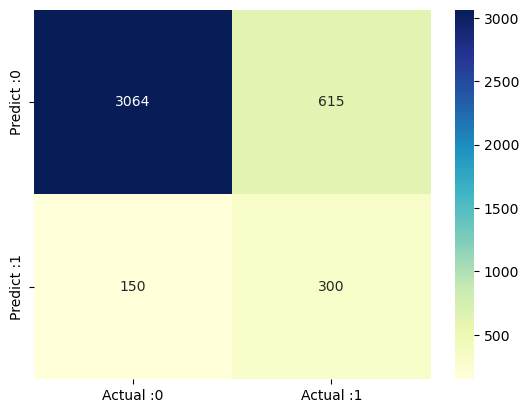

In [5]:
print('Accuracy: {0:0.4f}'.format(accuracy_score( y_val_pred , y_val)))
print("Precision-score :",
        round(precision_score(y_val_pred , y_val, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(y_val_pred , y_val, average='weighted'), 4))
print("F1-Score:", round(f1_score(y_val_pred , y_val, average='weighted'), 4))

print(classification_report(y_val_pred , y_val))

# Print confusion matrix of the model
cm = confusion_matrix(y_val_pred , y_val)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show()  

In [6]:
# Evaluate the accuracy on test_data
y_test_pred = best_mlp_clf.predict(X_test)
val_accuracy_default = accuracy_score(y_test, y_test_pred)
print(f"test accuracy with hyperparameter tuning: {val_accuracy_default}")

test accuracy with hyperparameter tuning: 0.8169491525423729


Accuracy: 0.8169
Precision-score : 0.8807
Recall-Score : 0.8169
F1-Score: 0.8393
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      3631
         1.0       0.36      0.69      0.48       499

    accuracy                           0.82      4130
   macro avg       0.66      0.76      0.68      4130
weighted avg       0.88      0.82      0.84      4130

Confusion matrix

 [[3029  602]
 [ 154  345]]

True Positives(TP) =  3029

True Negatives(TN) =  345

False Positives(FP) =  602

False Negatives(FN) =  154


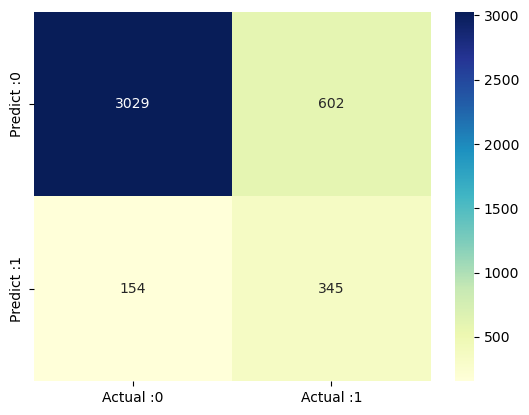

In [7]:
print('Accuracy: {0:0.4f}'.format(accuracy_score( y_test_pred, y_test)))
print("Precision-score :",
        round(precision_score(y_test_pred, y_test, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(y_test_pred, y_test, average='weighted'), 4))
print("F1-Score:", round(f1_score(y_test_pred, y_test, average='weighted'), 4))

print(classification_report(y_test_pred, y_test))

# Print confusion matrix of the model
cm = confusion_matrix(y_test_pred, y_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show()  

### Check best model performance on balanced training set

In [13]:
best_mlp_clf2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(8, 2),activation='logistic',batch_size=15,learning_rate_init=0.35,shuffle=True,alpha=0.01)
best_mlp_clf2.fit(X_EnhancedTrain, y_EnhancedTrain)

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.01, batch_size=15,
              hidden_layer_sizes=(8, 2), learning_rate_init=0.35,
              solver='lbfgs')

In [14]:
# Evaluate the accuracy on validation_data
y_test_pred = best_mlp_clf2.predict(X_test)
val_accuracy_default = accuracy_score(y_test, y_test_pred)
print(f"test accuracy with hyperparameter tuning: {val_accuracy_default}")

test accuracy with hyperparameter tuning: 0.5847457627118644


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.5847
Precision-score : 0.5961
Recall-Score : 0.5847
F1-Score: 0.5517
              precision    recall  f1-score   support

         0.0       0.57      0.84      0.68      2186
         1.0       0.62      0.30      0.41      1944

    accuracy                           0.58      4130
   macro avg       0.60      0.57      0.54      4130
weighted avg       0.60      0.58      0.55      4130

Confusion matrix

 [[1827  359]
 [1356  588]]

True Positives(TP) =  1827

True Negatives(TN) =  588

False Positives(FP) =  359

False Negatives(FN) =  1356


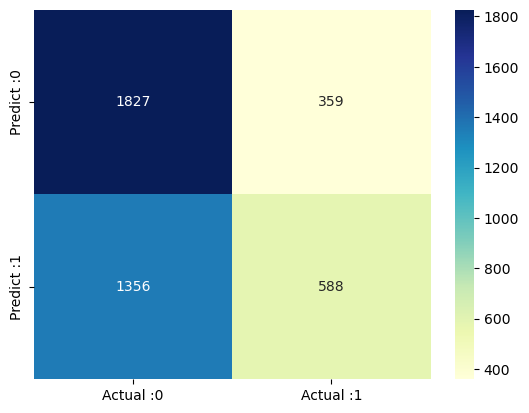

In [15]:
print('Accuracy: {0:0.4f}'.format(accuracy_score( y_test_pred, y_test)))
print("Precision-score :",
        round(precision_score(y_test_pred, y_test, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(y_test_pred, y_test, average='weighted'), 4))
print("F1-Score:", round(f1_score(y_test_pred, y_test, average='weighted'), 4))

print(classification_report(y_test_pred, y_test))

# Print confusion matrix of the model
cm = confusion_matrix(y_test_pred, y_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show()  